In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
sample_submission=pd.read_csv("sample_submission.csv")

In [111]:
train.isnull().sum()

id                     0
datetime               0
total_articles_read    0
dtype: int64

In [112]:
sample_submission

,id,total_articles_read
0,4561,2000
1,4562,2000
2,4563,2000
3,4564,2000
4,4565,2000
...,...,...
331,4892,2000
332,4893,2000
333,4894,2000
334,4895,2000


In [113]:
train.dtypes

id                      int64
datetime               object
total_articles_read     int64
dtype: object

In [114]:
def save_file(data,name):
    sample_submission["total_articles_read"]=data
    sample_submission.to_csv(name+".csv",index=False)

In [115]:
train["datetime"]=pd.to_datetime(train["datetime"])
test["datetime"]=pd.to_datetime(test["datetime"])

In [116]:
train.datetime.dt.month_name()

0          July
1          July
2          July
3          July
4          July
         ...   
4555    January
4556    January
4557    January
4558    January
4559    January
Name: datetime, Length: 4560, dtype: object

In [117]:
train.total_articles_read

0       1421
1       1116
2        921
3        824
4        737
        ... 
4555    2783
4556    2754
4557    2831
4558    2562
4559    2343
Name: total_articles_read, Length: 4560, dtype: int64

In [118]:
(31+31+30+31+30+31+6)*24

4560

<AxesSubplot:xlabel='datetime', ylabel='total_articles_read'>

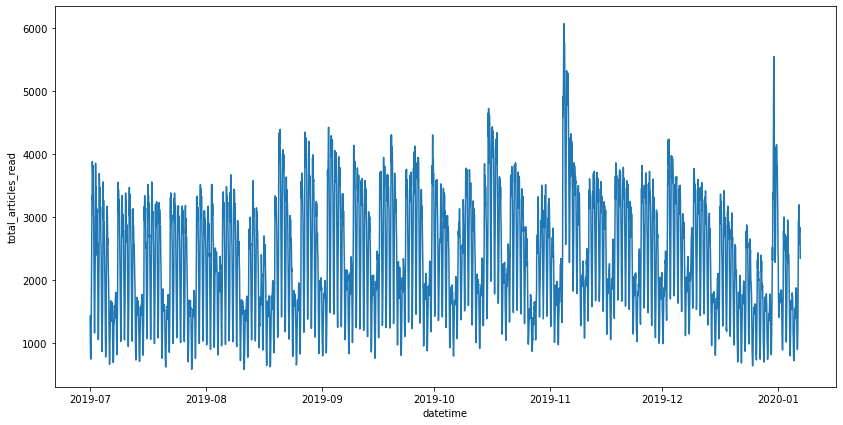

In [119]:
plt.figure(figsize=(14,7))
sns.lineplot(x=train["datetime"],y=train["total_articles_read"])

In [34]:
train.set_index('datetime')

,id,total_articles_read
datetime,,
2019-07-01 00:00:00,1,1421
2019-07-01 01:00:00,2,1116
2019-07-01 02:00:00,3,921
2019-07-01 03:00:00,4,824
2019-07-01 04:00:00,5,737
...,...,...
2020-01-06 19:00:00,4556,2783
2020-01-06 20:00:00,4557,2754
2020-01-06 21:00:00,4558,2831


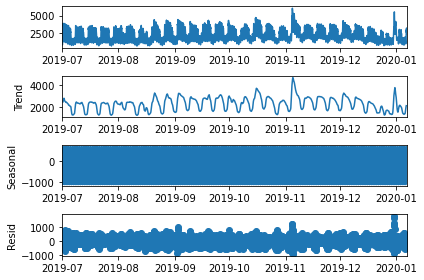

In [38]:
from statsmodels.tsa.api import seasonal_decompose

decomp=seasonal_decompose(train.set_index("datetime").drop(columns='id'))
decomp.plot()
plt.show()

In [9]:
monthly=pd.DataFrame(train.groupby(train.datetime.dt.month_name()).mean()["total_articles_read"]).reset_index()
monthly.rename(columns={'datetime':'Month'},inplace=True)
monthly

,Month,total_articles_read
0,August,2153.723118
1,December,2166.009409
2,January,1786.131944
3,July,2062.436828
4,November,2558.530556
5,October,2415.881720
6,September,2447.455556


In [10]:
train.datetime=="2019-12-24 23:00:00"

0       False
1       False
2       False
3       False
4       False
        ...  
4555    False
4556    False
4557    False
4558    False
4559    False
Name: datetime, Length: 4560, dtype: bool

In [11]:
train[train.datetime=="2019-12-24 23:00:00"]

,id,datetime,total_articles_read
4247,4248,2019-12-24 23:00:00,1526


In [19]:
train_data,valid_data=train.iloc[:4247,:],train.loc[4247:,:]

In [123]:
train_data

,id,datetime,total_articles_read
0,1,2019-07-01 00:00:00,1421
1,2,2019-07-01 01:00:00,1116
2,3,2019-07-01 02:00:00,921
3,4,2019-07-01 03:00:00,824
4,5,2019-07-01 04:00:00,737
...,...,...,...
4242,4243,2019-12-24 18:00:00,1976
4243,4244,2019-12-24 19:00:00,1960
4244,4245,2019-12-24 20:00:00,1901
4245,4246,2019-12-24 21:00:00,1836


In [124]:
train_data=train_data.set_index("datetime").drop(columns="id")
train_data

,total_articles_read
datetime,
2019-07-01 00:00:00,1421
2019-07-01 01:00:00,1116
2019-07-01 02:00:00,921
2019-07-01 03:00:00,824
2019-07-01 04:00:00,737
...,...
2019-12-24 18:00:00,1976
2019-12-24 19:00:00,1960
2019-12-24 20:00:00,1901


In [125]:
valid_data=valid_data.set_index("datetime").drop(columns="id")
valid_data

,total_articles_read
datetime,
2019-12-24 23:00:00,1526
2019-12-25 00:00:00,1280
2019-12-25 01:00:00,1065
2019-12-25 02:00:00,853
2019-12-25 03:00:00,782
...,...
2020-01-06 19:00:00,2783
2020-01-06 20:00:00,2754
2020-01-06 21:00:00,2831


Text(0.5, 1.0, 'Train and Validation Data')

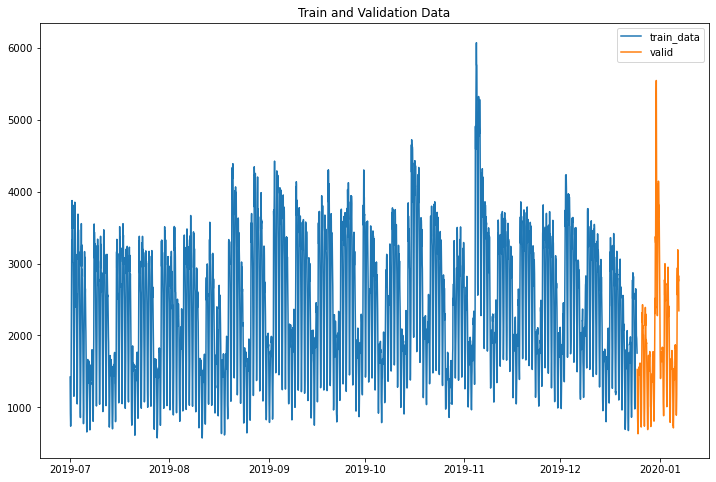

In [127]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['total_articles_read'], label='train_data')
plt.plot(valid_data.index,valid_data['total_articles_read'], label='valid')
plt.legend(loc='best')
plt.title("Train and Validation Data")
# plt.show()

## Basic Mean

In [26]:
np.full(test.shape[0],train.total_articles_read.mean())

array([2282.29451754, 2282.29451754, 2282.29451754, 2282.29451754,
       2282.29451754, 2282.29451754, 2282.29451754, 2282.29451754,
       2282.29451754, 2282.29451754, 2282.29451754, 2282.29451754,
       2282.29451754, 2282.29451754, 2282.29451754, 2282.29451754,
       2282.29451754, 2282.29451754, 2282.29451754, 2282.29451754,
       2282.29451754, 2282.29451754, 2282.29451754, 2282.29451754,
       2282.29451754, 2282.29451754, 2282.29451754, 2282.29451754,
       2282.29451754, 2282.29451754, 2282.29451754, 2282.29451754,
       2282.29451754, 2282.29451754, 2282.29451754, 2282.29451754,
       2282.29451754, 2282.29451754, 2282.29451754, 2282.29451754,
       2282.29451754, 2282.29451754, 2282.29451754, 2282.29451754,
       2282.29451754, 2282.29451754, 2282.29451754, 2282.29451754,
       2282.29451754, 2282.29451754, 2282.29451754, 2282.29451754,
       2282.29451754, 2282.29451754, 2282.29451754, 2282.29451754,
       2282.29451754, 2282.29451754, 2282.29451754, 2282.29451

In [29]:
save_file(np.full(test.shape[0],train.total_articles_read.mean()),"Basic Mean Model")

## Simple Exponential Smoothening

In [30]:
from statsmodels.tsa.api import SimpleExpSmoothing

In [44]:
model = SimpleExpSmoothing(np.asarray(train_data['total_articles_read']))
fit2 = model.fit(smoothing_level=0.4,optimized=False) 

valid_pred = fit2.forecast(len(valid_data['datetime']))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


In [45]:
from sklearn.metrics import mean_squared_error as mse

In [46]:
np.sqrt(mse(val["total_articles_read"],valid_pred))

884.7348827014475

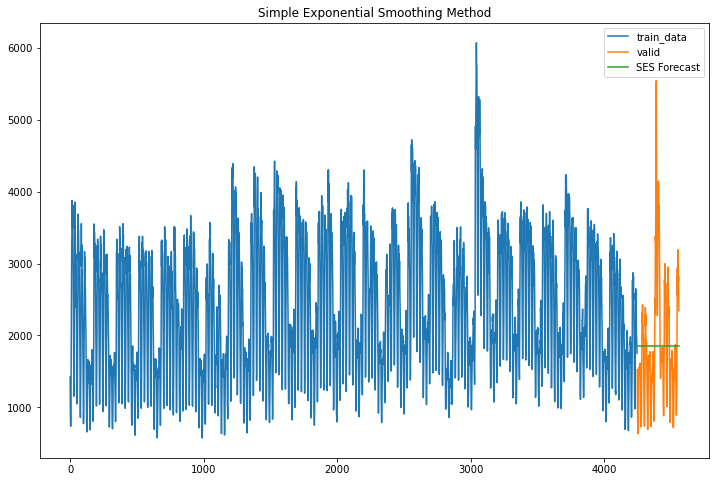

In [47]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['total_articles_read'], label='train_data')
plt.plot(valid_data.index,valid_data['total_articles_read'], label='valid')
plt.plot(valid_data.index,valid_pred, label='SES Forecast')
plt.legend(loc='best')
plt.title("Simple Exponential Smoothing Method")
plt.show()

## Double Exponential Smoothening

In [50]:
from statsmodels.tsa.api import SimpleExpSmoothing, ExponentialSmoothing

In [180]:
model = ExponentialSmoothing(np.asarray(train_data['total_articles_read']),seasonal='add',seasonal_periods=7*24)
fit2 = model.fit() 

valid_pred = fit2.forecast(len(valid_data['total_articles_read']))

valid_pred = valid_pred+1300

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


In [181]:
valid_pred

array([2562.35854144, 2279.10489939, 1906.28051669, 1603.91110837,
       1254.996181  ,  875.89853343,  788.58885804,  904.34755637,
       1241.21254972, 1608.06747105, 1973.61739451, 2521.91249679,
       2851.81084143, 2930.28268465, 2659.67108627, 3071.86017753,
       3090.76507102, 2832.41569971, 2729.77084454, 2883.43356014,
       3067.03085671, 3071.26267684, 3014.61926316, 2772.54850657,
       2465.17646697, 2191.92092749, 1810.65305894, 1487.24806409,
       1125.10875797,  814.05694939,  694.4904326 ,  885.80532569,
       1163.35428846, 1452.50903315, 1856.69031295, 2362.40028652,
       2691.85617598, 2765.31882195, 2550.89176752, 2903.46344897,
       2956.47446902, 2630.14882533, 2456.1530353 , 2654.58434773,
       2852.29429626, 2821.90507287, 2663.94768682, 2453.27145338,
       2189.82835466, 1949.90354521, 1605.88745502, 1302.10817346,
       1005.57004323,  729.41810681,  590.62616909,  725.9620009 ,
        977.05347772, 1264.82407247, 1608.33115311, 2070.60086

In [182]:
from sklearn.metrics import mean_squared_error as mse

In [183]:
np.sqrt(mse(val["total_articles_read"],valid_pred))

597.3246816950785

ValueError: x and y must have same first dimension, but have shapes (313,) and (336,)

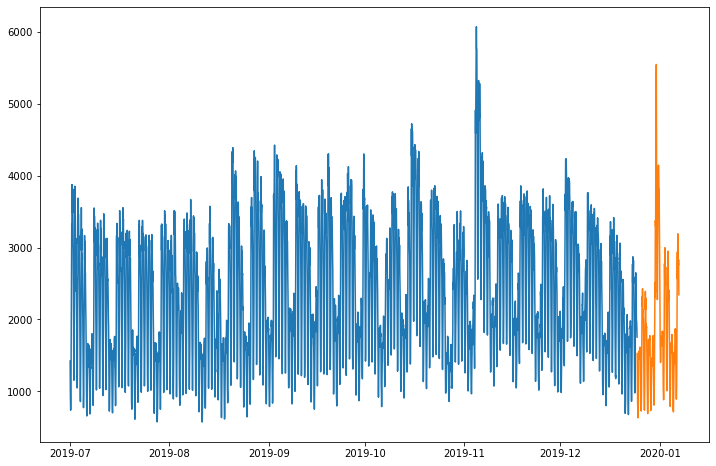

In [192]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['total_articles_read'], label='train_data')
plt.plot(valid_data.index,valid_data['total_articles_read'], label='valid')
plt.plot(valid_data.index,valid_pred, label='SES Forecast')
plt.legend(loc='best')
plt.title("Holt Winter's")
plt.show()

In [188]:
test

,id,datetime
0,4561,2020-07-01 00:00:00
1,4562,2020-07-01 01:00:00
2,4563,2020-07-01 02:00:00
3,4564,2020-07-01 03:00:00
4,4565,2020-07-01 04:00:00
...,...,...
331,4892,2020-01-20 19:00:00
332,4893,2020-01-20 20:00:00
333,4894,2020-01-20 21:00:00
334,4895,2020-01-20 22:00:00


In [190]:
model1 = ExponentialSmoothing(np.asarray(train['total_articles_read']),seasonal='add',seasonal_periods=7*24)
fit1 = model1.fit() 

test_pred = fit1.forecast(len(test['id']))

test_pred = test_pred + 1300

In [193]:
test_pred

array([3325.66067331, 2935.33831762, 2760.54473937, 2530.36987281,
       2183.64529662, 2071.48618426, 2108.83324053, 2421.37587292,
       2745.63350662, 3172.77787588, 3721.97615328, 3982.82002342,
       4140.95341107, 3851.5329005 , 4262.15160596, 4396.71610456,
       4157.1999776 , 3929.56123179, 3999.47586154, 4218.48150071,
       4197.71226028, 4099.36406045, 3988.02601328, 3563.1816168 ,
       3137.80507411, 2837.65862468, 2450.43857504, 2176.15556406,
       1826.8167106 , 1647.36851939, 1666.67896683, 1876.47034632,
       2269.92846307, 2623.12593719, 3126.40638816, 3505.24927726,
       3751.21421538, 3613.58124714, 3821.03737277, 3920.23167381,
       3866.72622402, 3760.68267836, 3812.60371583, 3916.35899847,
       3946.22177168, 3951.80734315, 3819.15432371, 3550.16433898,
       3214.52792804, 2776.12879635, 2488.21926634, 2165.20704221,
       1874.16952738, 1653.65691348, 1703.78682599, 1942.85224564,
       2209.61507909, 2642.0281759 , 3184.39043002, 3576.81635

In [191]:
save_file(test_pred,"Holt Winter's Model")

## Stationarity Test

In [91]:
# dickey fuller, KPSS
from statsmodels.tsa.stattools import adfuller, kpss

In [92]:
def adf_test(timeseries):
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [93]:
adf_test(train_data['total_articles_read'])

Results of Dickey-Fuller Test:
Test Statistic                -8.420147e+00
p-value                        1.993716e-13
#Lags Used                     2.900000e+01
Number of Observations Used    4.217000e+03
Critical Value (1%)           -3.431902e+00
Critical Value (5%)           -2.862226e+00
Critical Value (10%)          -2.567135e+00
dtype: float64


In [94]:
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

In [102]:
kpss_test(train_data['total_articles_read'])

Results of KPSS Test:
Test Statistic            0.771933
p-value                   0.010000
Lags Used                31.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


## ACF and PACF

In [194]:
from statsmodels.tsa.api import acf,pacf

In [202]:
lag_acf = acf(train_data['total_articles_read'].dropna(), nlags=500) 
lag_pacf = pacf(train_data['total_articles_read'].dropna(), nlags=50)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:666: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


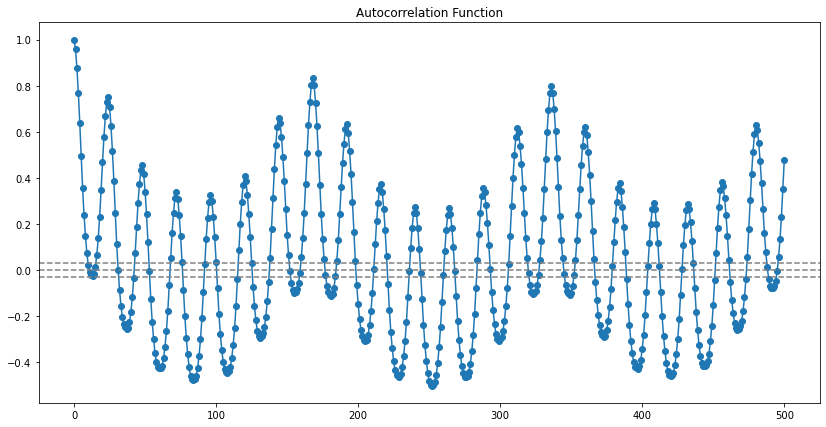

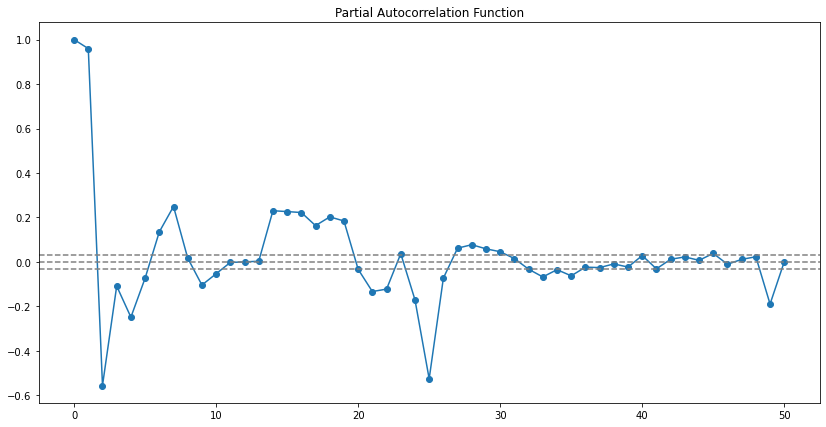

In [203]:
plt.figure(figsize=(14,7))
plt.plot(lag_acf,  marker='o') 
plt.axhline(y=0,linestyle='--',color='gray') 
plt.axhline(y=-1.96/np.sqrt(len(train_data['total_articles_read'].dropna())),linestyle='--',color='gray') 
plt.axhline(y=1.96/np.sqrt(len(train_data['total_articles_read'].dropna())),linestyle='--',color='gray') 
plt.title('Autocorrelation Function') 
plt.show() 

plt.figure(figsize=(14,7))
plt.plot(lag_pacf, marker='o') 
plt.axhline(y=0,linestyle='--',color='gray') 
plt.axhline(y=-1.96/np.sqrt(len(train_data['total_articles_read'].dropna())),linestyle='--',color='gray') 
plt.axhline(y=1.96/np.sqrt(len(train_data['total_articles_read'].dropna())),linestyle='--',color='gray') 
plt.title('Partial Autocorrelation Function') 
plt.show()

## SARIMA

In [217]:
from statsmodels.tsa.statespace import sarimax

model = sarimax.SARIMAX(train_data['total_articles_read'], seasonal_order=(1,1,1,24), order=(7,0,9))
fit1 = model.fit()

valid_data['SARIMA'] = fit1.predict(start="2019-12-24 23:00:00", end="2020-01-06 23:00:00", dynamic=True)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [218]:
valid_data

,total_articles_read,SARIMA
datetime,,
2019-12-24 23:00:00,1526,1521.859952
2019-12-25 00:00:00,1280,1334.376908
2019-12-25 01:00:00,1065,1075.181682
2019-12-25 02:00:00,853,899.221504
2019-12-25 03:00:00,782,768.747795
...,...,...
2020-01-06 19:00:00,2783,2737.622531
2020-01-06 20:00:00,2754,2717.183489
2020-01-06 21:00:00,2831,2643.778938


In [219]:
np.sqrt(mse(valid_data["total_articles_read"],valid_data["SARIMA"]))

741.1291524806492

In [220]:
valid_data

,total_articles_read,SARIMA
datetime,,
2019-12-24 23:00:00,1526,1521.859952
2019-12-25 00:00:00,1280,1334.376908
2019-12-25 01:00:00,1065,1075.181682
2019-12-25 02:00:00,853,899.221504
2019-12-25 03:00:00,782,768.747795
...,...,...
2020-01-06 19:00:00,2783,2737.622531
2020-01-06 20:00:00,2754,2717.183489
2020-01-06 21:00:00,2831,2643.778938


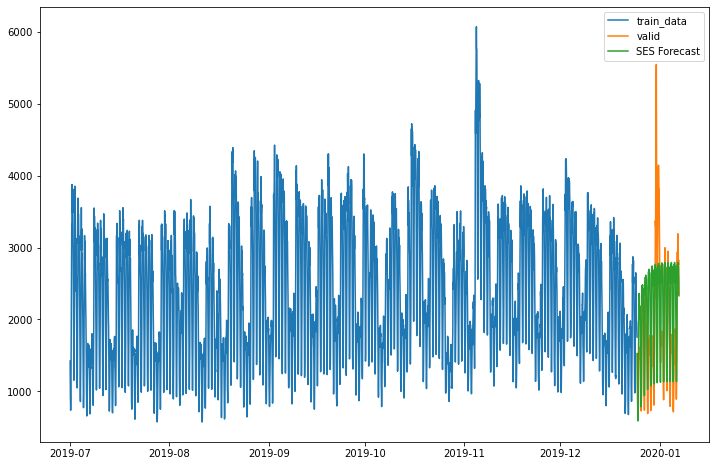

In [221]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['total_articles_read'], label='train_data')
plt.plot(valid_data.index,valid_data['total_articles_read'], label='valid')
plt.plot(valid_data.index,valid_data['SARIMA'], label='SES Forecast')
plt.legend(loc='best')
plt.show()